In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Dataframe
path_df = "pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)



In [3]:
print(features_train.shape)
print(features_test.shape)

(3434, 200)
(606, 200)


In [4]:
svc = svm.SVC(kernel='linear')
svc.fit(features_train, labels_train)

SVC(kernel='linear')

In [7]:
svc_pred = svc.predict(features_test)

In [11]:
print("The training accuracy is: ", accuracy_score(labels_train, svc.predict(features_train)))
print("The test accuracy is: ", accuracy_score(labels_test, svc_pred))

print("Classification report")
print(classification_report(labels_test,svc_pred))


The training accuracy is:  0.7562609202096681
The test accuracy is:  0.7458745874587459
Classification report
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       451
           1       1.00      0.01      0.01       155

    accuracy                           0.75       606
   macro avg       0.87      0.50      0.43       606
weighted avg       0.81      0.75      0.64       606



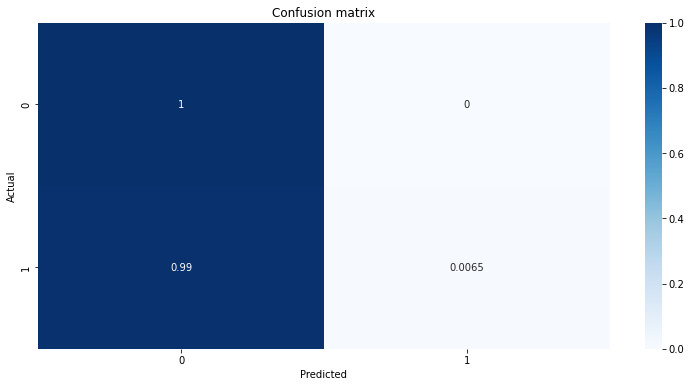

In [18]:
conf_matrix = confusion_matrix(labels_test, svc_pred, normalize='true')
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=[0,1], 
            yticklabels=[0,1],
            cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()